In [1]:
# https://www.tensorflow.org/tutorials/load_data/images

In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [3]:
print(tf.__version__)

2.11.0


In [4]:
batch_size = 32
img_height = 208
img_width = 176

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "AlzheimersDataset",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6400 files belonging to 2 classes.
Using 5120 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "AlzheimersDataset",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6400 files belonging to 2 classes.
Using 1280 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Negative', 'Positive']


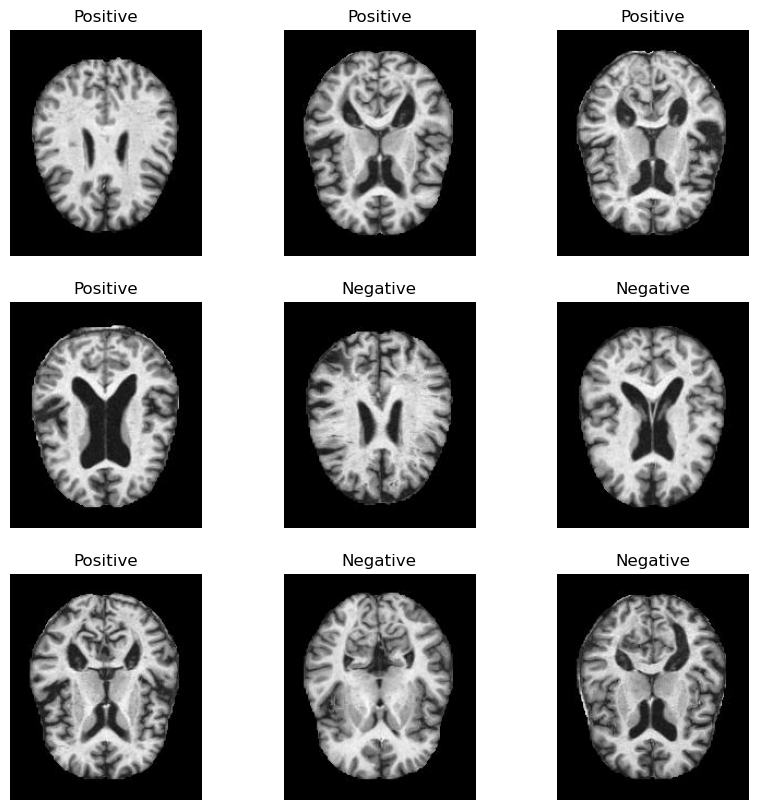

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [10]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 0.9843138


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [13]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
160/160 [==============================] - 127s 773ms/step - loss: 0.6302 - accuracy: 0.6408 - val_loss: 0.5376 - val_accuracy: 0.7320
Epoch 2/10
160/160 [==============================] - 130s 814ms/step - loss: 0.4705 - accuracy: 0.7715 - val_loss: 0.4415 - val_accuracy: 0.7836
Epoch 3/10
160/160 [==============================] - 126s 785ms/step - loss: 0.3183 - accuracy: 0.8547 - val_loss: 0.3284 - val_accuracy: 0.8469
Epoch 4/10
160/160 [==============================] - 126s 786ms/step - loss: 0.1853 - accuracy: 0.9236 - val_loss: 0.2277 - val_accuracy: 0.9055
Epoch 5/10
160/160 [==============================] - 128s 802ms/step - loss: 0.1048 - accuracy: 0.9613 - val_loss: 0.1301 - val_accuracy: 0.9516
Epoch 6/10
160/160 [==============================] - 128s 802ms/step - loss: 0.0875 - accuracy: 0.9684 - val_loss: 0.1804 - val_accuracy: 0.9336
Epoch 7/10
160/160 [==============================] - 129s 805ms/step - loss: 0.0569 - accuracy: 0.9787 - val_loss: 0.1386 -